In [1]:
import dask
from time import sleep, time
import numpy as np
from matplotlib import pyplot as plt

import multiprocessing
# Get the number of CPU cores
num_cores = multiprocessing.cpu_count()

print("Number of available CPU cores according to multiprocessing:", num_cores)

Number of available CPU cores according to multiprocessing: 32


Dask seems to understand how many CPUs are actually avalable, while multiprocessing just reports the whole node
## Dask

Text(0, 0.5, 'Time')

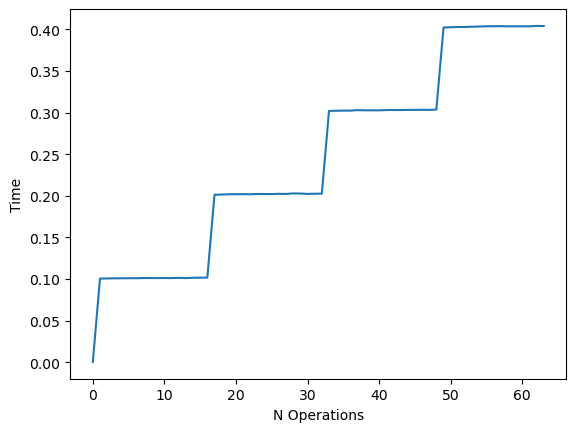

In [4]:
@dask.delayed
def inc(x):
    sleep(.1)
    return x + 1

@dask.delayed
def add(nums):
    # sleep(1)
    return sum(nums)

operations = np.arange(64)
times = []
for j in operations:
    nums = []
    for i in range(j):
        nums.append(inc(i))
    z = add(nums)
    start = time()
    z.compute()
    end = time()
    times.append(end - start)
plt.plot(operations, times)
plt.xlabel("N Operations")
plt.ylabel("Time")

## Serial

In [21]:
def inc(x):
    sleep(.1)
    return x + 1


def add(nums):
    # sleep(1)
    return sum(nums)

nums = []
for i in range(8):
    nums.append(inc(i))
z = add(nums)
z

36